In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#from keras.datasets import imdb

#### Classifying movie reviews: a binary classification example

In [13]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [14]:
max(max(seq) for seq in train_data)

9999

In [6]:
word2idx = imdb.get_word_index()
idx2word = {i:w for w,i in word2idx.items()}

1646592/1641221 [==============================] - 7s 4us/step


In [15]:
" ".join(idx2word.get(i-3, '?') for i in train_data[0])

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

##### preparing the data

In [17]:
def vectorize_sequence(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, seq in enumerate(sequences):
        results[i, seq] = 1.
    return results

In [25]:
vectorize_sequence([[1,2,3], [1,4], [3]], dimension=5)

array([[0., 1., 1., 1., 0.],
       [0., 1., 0., 0., 1.],
       [0., 0., 0., 1., 0.]])

In [19]:
x_train = vectorize_sequence(train_data)

In [20]:
x_test = vectorize_sequence(test_data)

In [27]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [84]:
x_val, y_val = x_train[:10000], y_train[:10000]
x_train, y_train = x_train[10000:], y_train[10000:]

In [85]:
x_train.shape, y_train.shape, x_val.shape, y_val.shape, x_test.shape, y_test.shape

((15000, 10000), (15000,), (10000, 10000), (10000,), (25000, 10000), (25000,))

In [86]:
# building model
from keras import models, layers, optimizers, losses, metrics

nn = models.Sequential()
nn.add(layers.Dense(units=16, activation='relu', input_shape=(10000,)))
nn.add(layers.Dense(units=16, activation='relu'))
nn.add(layers.Dense(units=1, activation='sigmoid'))

# define loss function, optimizer and evaluation metric
nn.compile(optimizer=optimizers.RMSprop(lr=1e-3), 
           loss=losses.binary_crossentropy, 
           metrics=['accuracy'])

In [76]:
history = nn.fit(x_train2, y_train2, 
                 batch_size=512, epochs=2, 
                 validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/2
15000/15000 [==============================] - 5s 316us/step - loss: 0.5442 - acc: 0.7719 - val_loss: 0.4298 - val_acc: 0.8515
Epoch 2/2
15000/15000 [==============================] - 4s 243us/step - loss: 0.3354 - acc: 0.8971 - val_loss: 0.3191 - val_acc: 0.8857


In [77]:
history.history.keys()

dict_keys(['val_acc', 'acc', 'loss', 'val_loss'])

In [62]:
loss_vals = history.history['val_loss']
loss_tr = history.history['loss']
val_acc = history.history['val_binary_accuracy']
tr_acc = history.history['binary_accuracy']

Text(0,0.5,'accuracy')

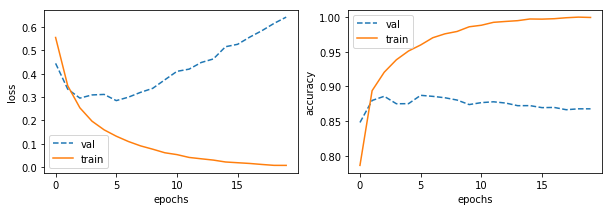

In [63]:
fig, ax = plt.subplots(ncols=2, figsize=(10, 3))

ax[0].plot(loss_vals, '--', label='val')
ax[0].plot(loss_tr, label='train')
ax[0].legend()
ax[0].set_xlabel('epochs')
ax[0].set_ylabel('loss')

ax[1].plot(val_acc, '--', label='val')
ax[1].plot(tr_acc, label='train')
ax[1].legend()
ax[1].set_xlabel('epochs')
ax[1].set_ylabel('accuracy')

In [64]:
nn = models.Sequential()
nn.add(layers.Dense(units=16, activation='relu', input_shape=(10000,)))
nn.add(layers.Dense(units=16, activation='relu'))
nn.add(layers.Dense(units=1, activation='sigmoid'))

# define loss function, optimizer and evaluation metric
nn.compile(optimizer=optimizers.RMSprop(lr=1e-3), 
           loss=losses.binary_crossentropy, 
           metrics=[metrics.binary_accuracy])

nn.fit(x_train, y_train, epochs=4, batch_size=512)

Epoch 1/4
25000/25000 [==============================] - 5s 207us/step - loss: 0.4632 - binary_accuracy: 0.8182
Epoch 2/4
25000/25000 [==============================] - 4s 153us/step - loss: 0.2659 - binary_accuracy: 0.9061
Epoch 3/4
25000/25000 [==============================] - 4s 149us/step - loss: 0.2045 - binary_accuracy: 0.9273
Epoch 4/4
25000/25000 [==============================] - 4s 158us/step - loss: 0.1705 - binary_accuracy: 0.9400


In [66]:
nn.evaluate(x_test, y_test)

25000/25000 [==============================] - 11s 437us/step


[0.2901304787540436, 0.88524]

In [127]:
def run_model(n_input, hiddens, n_output, X_train, y_train, X_val, y_val, 
              activation='relu', loss='binary_crossentropy', optimizer='rmsprop',
              n_epochs=10, batch_size=512):
    '''create Fully connected neural network and trained on the given data 
    return the best model evaluated on the validation data'''
    model = models.Sequential()
    assert len(hiddens) > 0
    model.add(layers.Dense(units=hiddens[0], input_shape=(n_input,), activation=activation))
    for n in hiddens[1:]:
        model.add(layers.Dense(units=n, activation=activation))
    model.add(layers.Dense(units=n_output, activation='sigmoid'))
    model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])
    
    history = model.fit(x_train, y_train, epochs=n_epochs, 
                        batch_size=batch_size, validation_data=(x_val, y_val))
    
    hx = history.history
    loss_tr, acc_tr = hx['loss'], hx['acc']
    loss_val, acc_val = hx['val_loss'], hx['val_acc']
    best_epoch = np.argmax(acc_val) + 1
    print("#"*30)
    print("Best validation accuracy: {} epochs, accuracy: {:.4f}".format(best_epoch, acc_val[best_epoch-1]))
    print("#"*30)
    xs = range(1, len(loss_tr)+1)
    fig, ax = plt.subplots(ncols=2, figsize=(10, 3))
    ax[0].plot(xs, loss_tr, label='train')
    ax[0].plot(xs, loss_val, '--', label='val')
    ax[0].set_xlabel('epochs')
    ax[0].set_ylabel('loss')
    ax[0].legend()
    
    ax[1].plot(xs, acc_tr, label='train')
    ax[1].plot(xs, acc_val, '--', label='val')
    ax[1].set_xlabel('epochs')
    ax[1].set_ylabel('accuracy')
    ax[1].legend()
    
    model = models.clone_model(model)
    model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])
    model.fit(np.concatenate((x_train, x_val)), np.concatenate((y_train, y_val)), 
                           epochs=best_epoch, batch_size=batch_size, verbose=0)
    return model

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 6s 389us/step - loss: 0.5167 - acc: 0.7741 - val_loss: 0.3778 - val_acc: 0.8651
Epoch 2/20
15000/15000 [==============================] - 4s 236us/step - loss: 0.2936 - acc: 0.9011 - val_loss: 0.3027 - val_acc: 0.8830
Epoch 3/20
15000/15000 [==============================] - 4s 242us/step - loss: 0.2070 - acc: 0.9317 - val_loss: 0.2746 - val_acc: 0.8889
Epoch 4/20
15000/15000 [==============================] - 4s 254us/step - loss: 0.1644 - acc: 0.9444 - val_loss: 0.2889 - val_acc: 0.8851
Epoch 5/20
15000/15000 [==============================] - 4s 255us/step - loss: 0.1330 - acc: 0.9563 - val_loss: 0.3112 - val_acc: 0.8821
Epoch 6/20
15000/15000 [==============================] - 4s 269us/step - loss: 0.1050 - acc: 0.9681 - val_loss: 0.3137 - val_acc: 0.8828
Epoch 7/20
15000/15000 [==============================] - 4s 263us/step - loss: 0.0882 - acc: 0.9725 - val_loss: 0.3357 - 

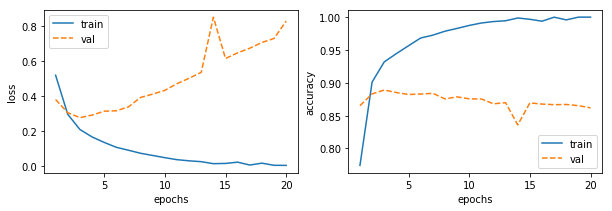

In [126]:
# 3 hidden layers model
nn = run_model(10000, [16, 16, 16], 1, 
               x_train, y_train, x_val, y_val, n_epochs=20)

In [115]:
nn.evaluate(x_test, y_test)

25000/25000 [==============================] - 8s 317us/step


[0.2853150769329071, 0.8868]

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 6s 383us/step - loss: 0.4973 - acc: 0.7767 - val_loss: 0.3475 - val_acc: 0.8779
Epoch 2/20
15000/15000 [==============================] - 4s 254us/step - loss: 0.2718 - acc: 0.9077 - val_loss: 0.2819 - val_acc: 0.8905
Epoch 3/20
15000/15000 [==============================] - 4s 256us/step - loss: 0.2009 - acc: 0.9309 - val_loss: 0.2825 - val_acc: 0.8888
Epoch 4/20
15000/15000 [==============================] - 4s 242us/step - loss: 0.1555 - acc: 0.9464 - val_loss: 0.2823 - val_acc: 0.8886
Epoch 5/20
15000/15000 [==============================] - 3s 233us/step - loss: 0.1241 - acc: 0.9577 - val_loss: 0.2970 - val_acc: 0.8861
Epoch 6/20
15000/15000 [==============================] - 3s 225us/step - loss: 0.0962 - acc: 0.9692 - val_loss: 0.3213 - val_acc: 0.8819
Epoch 7/20
15000/15000 [==============================] - 4s 242us/step - loss: 0.0735 - acc: 0.9782 - val_loss: 0.3632 - 

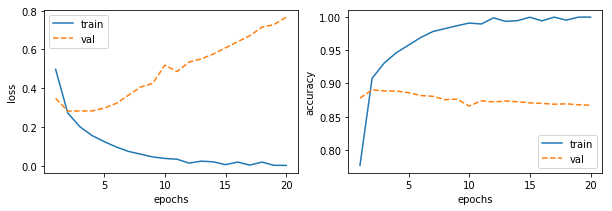

In [116]:
# hidden layer: 32 units
nn = run_model(10000, [32, 32], 1, x_train, y_train, x_val, y_val, n_epochs=20)

In [117]:
nn.evaluate(x_test, y_test)

25000/25000 [==============================] - 8s 335us/step


[0.33091116626739503, 0.8642]

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 5s 341us/step - loss: 0.4954 - acc: 0.7994 - val_loss: 0.3906 - val_acc: 0.8664
Epoch 2/20
15000/15000 [==============================] - 4s 255us/step - loss: 0.3149 - acc: 0.9028 - val_loss: 0.3165 - val_acc: 0.8878
Epoch 3/20
15000/15000 [==============================] - 4s 240us/step - loss: 0.2441 - acc: 0.9257 - val_loss: 0.2890 - val_acc: 0.8913
Epoch 4/20
15000/15000 [==============================] - 4s 265us/step - loss: 0.2010 - acc: 0.9379 - val_loss: 0.2808 - val_acc: 0.8885
Epoch 5/20
15000/15000 [==============================] - 4s 244us/step - loss: 0.1709 - acc: 0.9490 - val_loss: 0.2847 - val_acc: 0.8862
Epoch 6/20
15000/15000 [==============================] - 4s 255us/step - loss: 0.1478 - acc: 0.9563 - val_loss: 0.2749 - val_acc: 0.8901
Epoch 7/20
15000/15000 [==============================] - 4s 252us/step - loss: 0.1290 - acc: 0.9627 - val_loss: 0.2795 - 

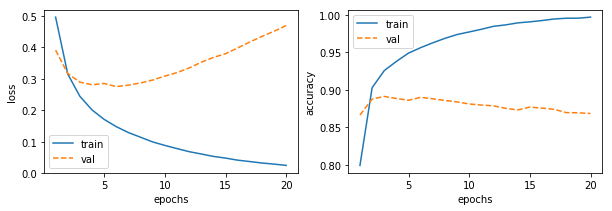

In [118]:
# 1 hidden layer model
nn = run_model(10000, [16], 1, x_train, y_train, x_val, y_val, n_epochs=20)

In [119]:
nn.evaluate(x_test, y_test)

25000/25000 [==============================] - 8s 327us/step


[0.2848165518665314, 0.88684]

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 5s 361us/step - loss: 0.4770 - acc: 0.7813 - val_loss: 0.3416 - val_acc: 0.8650
Epoch 2/20
15000/15000 [==============================] - 4s 259us/step - loss: 0.2654 - acc: 0.8982 - val_loss: 0.2782 - val_acc: 0.8912
Epoch 3/20
15000/15000 [==============================] - 4s 260us/step - loss: 0.1884 - acc: 0.9283 - val_loss: 0.2774 - val_acc: 0.8889
Epoch 4/20
15000/15000 [==============================] - 4s 256us/step - loss: 0.1476 - acc: 0.9471 - val_loss: 0.3107 - val_acc: 0.8790
Epoch 5/20
15000/15000 [==============================] - 4s 259us/step - loss: 0.1013 - acc: 0.9649 - val_loss: 0.6700 - val_acc: 0.7992
Epoch 6/20
15000/15000 [==============================] - 3s 232us/step - loss: 0.0832 - acc: 0.9731 - val_loss: 0.3639 - val_acc: 0.8786
Epoch 7/20
15000/15000 [==============================] - 4s 261us/step - loss: 0.0598 - acc: 0.9813 - val_loss: 0.3848 - 

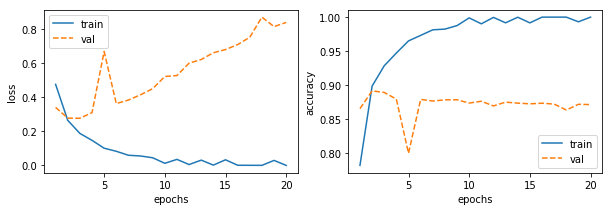

In [120]:
# hidden layer: 64 units
nn = run_model(10000, [64, 64], 1, x_train, y_train, x_val, y_val, n_epochs=20)

In [121]:
nn.evaluate(x_test, y_test)

25000/25000 [==============================] - 8s 339us/step


[0.3576681228351593, 0.8528]

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 6s 382us/step - loss: 0.4828 - acc: 0.7957 - val_loss: 0.3781 - val_acc: 0.8574
Epoch 2/20
15000/15000 [==============================] - 3s 223us/step - loss: 0.2826 - acc: 0.9065 - val_loss: 0.3390 - val_acc: 0.8588
Epoch 3/20
15000/15000 [==============================] - 3s 231us/step - loss: 0.2007 - acc: 0.9353 - val_loss: 0.2873 - val_acc: 0.8814
Epoch 4/20
15000/15000 [==============================] - 4s 242us/step - loss: 0.1567 - acc: 0.9467 - val_loss: 0.2872 - val_acc: 0.8840
Epoch 5/20
15000/15000 [==============================] - 4s 235us/step - loss: 0.1186 - acc: 0.9622 - val_loss: 0.2936 - val_acc: 0.8851
Epoch 6/20
15000/15000 [==============================] - 4s 239us/step - loss: 0.0929 - acc: 0.9704 - val_loss: 0.3228 - val_acc: 0.8801
Epoch 7/20
15000/15000 [==============================] - 4s 234us/step - loss: 0.0742 - acc: 0.9775 - val_loss: 0.3610 - 

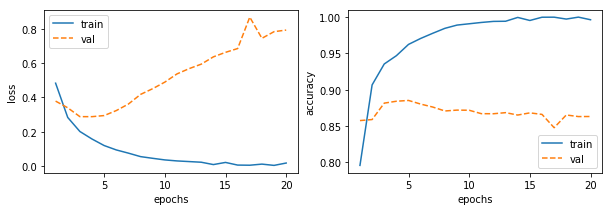

In [122]:
# tanh activation
nn = run_model(10000, [16, 16], 1, x_train, y_train, x_val, y_val, n_epochs=20, activation='tanh')

In [123]:
nn.evaluate(x_test, y_test)

25000/25000 [==============================] - 8s 318us/step


[0.3468791173505783, 0.87308]

#### Classifying newswires

In [2]:
from keras.datasets import reuters

In [4]:
from keras import layers, models, optimizers, losses

In [3]:
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

2113536/2110848 [==============================] - 9s 4us/step


In [7]:
word2idx = reuters.get_word_index()

557056/550378 [==============================] - 5s 10us/step


In [8]:
idx2word = {i:w for w,i in word2idx.items()}

In [12]:
" ".join(idx2word.get(i-3, '?') for i in train_data[0])

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

In [15]:
max(max(seq) for seq in train_data), max(train_labels)

(9999, 45)

In [16]:
# Helper functions: preparing the data

def vectorize_sequence(sequences, dimension):
    '''convert each list of integers in the sequences into
    a vector with corresponding dimension'''
    results = np.zeros((len(sequences), dimension))
    for i, seq in enumerate(sequences):
        results[i, seq] = 1.
    return results

def to_one_hot(labels, dimension):
    '''convert integer labels in to array of one-hot vectors'''
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results

In [17]:
x_train = vectorize_sequence(train_data, dimension=10000)
x_test = vectorize_sequence(test_data, dimension=10000)

y_train_onehot = to_one_hot(train_labels, dimension=46)
y_test_onehot = to_one_hot(test_labels, dimension=46)

x_train.shape, y_train_onehot.shape, x_test.shape, y_test_onehot.shape

((8982, 10000), (8982, 46), (2246, 10000), (2246, 46))

In [18]:
x_val = x_train[:1000]
y_val_onehot = y_train_onehot[:1000]

x_train = x_train[1000:]
y_train_onehot = y_train_onehot[1000:]

x_train.shape, y_train_onehot.shape, x_val.shape, y_val_onehot.shape

((7982, 10000), (7982, 46), (1000, 10000), (1000, 46))

In [41]:
# building network

inputs = 10000
hiddens = [64, 64]
outputs = 46

hidden_activation = 'relu'
output_activation = 'softmax'

loss_func = 'categorical_crossentropy'
optimizer = 'rmsprop'

batch_size = 512
epochs = 20

def train_model(inputs, hiddens, outputs, hidden_activation='relu', 
                output_activation='softmax', loss_func='categorical_crossentropy', 
                optimizer='rmsprop', batch_size=512, epochs=20):
    '''
    - create and train model with train/val data
    - display training result and get the best epoch
    - retrain model with the best result using train + val data
    '''
    # create model
    model = models.Sequential()
    model.add(layers.Dense(hiddens[0], input_shape=(inputs,), 
                           activation=hidden_activation))
    for n in hiddens[1:]:
        model.add(layers.Dense(n, activation=hidden_activation))

    model.add(layers.Dense(outputs, activation=output_activation))

    model.compile(loss=loss_func, optimizer=optimizer, metrics=['accuracy'])

    history = model.fit(x_train, y_train_onehot, batch_size=batch_size, epochs=epochs, 
                        verbose=1, validation_data=(x_val, y_val_onehot))

    # display training result

    hx = history.history
    tr_acc, tr_loss = hx['acc'], hx['loss']
    val_acc, val_loss = hx['val_acc'], hx['val_loss']

    fig, ax = plt.subplots(ncols=2, figsize=(10, 3))

    xs = range(1, len(tr_acc)+1)

    ax[0].plot(xs, tr_loss, label='train')
    ax[0].plot(xs, val_loss, '--', label='val')
    ax[0].set_xlabel('epochs')
    ax[0].set_ylabel('loss')
    ax[0].legend(loc='best')

    ax[1].plot(xs, tr_acc, label='train')
    ax[1].plot(xs, val_acc, '--', label='val')
    ax[1].set_xlabel('epochs')
    ax[1].set_ylabel('accuracy')
    ax[1].legend(loc='best')

    fig.tight_layout()

    # re-train final model with the best epoch

    best_epoch = np.argmax(val_acc)
    print("#"*30)
    print("Best epoch: {}, validation accuracy: {:.4f}".format(best_epoch+1, val_acc[best_epoch]))
    print("#"*30)


    final_model = models.clone_model(model)
    final_model.compile(loss=loss_func, optimizer=optimizer, metrics=['accuracy'])
    final_model.fit(np.concatenate((x_train, x_val)), np.concatenate((y_train_onehot, y_val_onehot)), 
                    epochs=best_epoch+1, batch_size=batch_size, verbose=0)
    
    return final_model

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 2s 298us/step - loss: 2.7110 - acc: 0.5071 - val_loss: 1.7344 - val_acc: 0.6390
Epoch 2/20
7982/7982 [==============================] - 1s 177us/step - loss: 1.4293 - acc: 0.7072 - val_loss: 1.3076 - val_acc: 0.7040
Epoch 3/20
7982/7982 [==============================] - 2s 204us/step - loss: 1.0598 - acc: 0.7764 - val_loss: 1.1442 - val_acc: 0.7500
Epoch 4/20
7982/7982 [==============================] - 2s 190us/step - loss: 0.8370 - acc: 0.8260 - val_loss: 1.0169 - val_acc: 0.7900
Epoch 5/20
7982/7982 [==============================] - 2s 197us/step - loss: 0.6714 - acc: 0.8608 - val_loss: 0.9602 - val_acc: 0.8040
Epoch 6/20
7982/7982 [==============================] - ETA: 0s - loss: 0.5323 - acc: 0.889 - 2s 192us/step - loss: 0.5322 - acc: 0.8890 - val_loss: 0.9567 - val_acc: 0.7930
Epoch 7/20
7982/7982 [==============================] - 2s 197us/step - loss: 0.4294 - acc: 0.9107

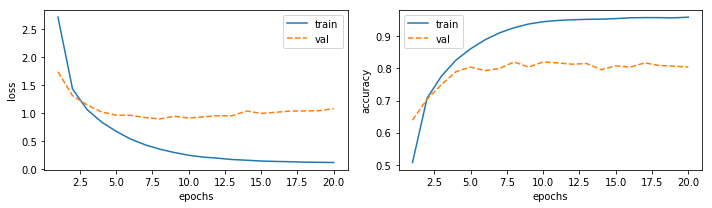

In [42]:
nn = train_model(10000, [64, 64], 46)

In [43]:
nn.evaluate(x_test, y_test_onehot)

2246/2246 [==============================] - 1s 345us/step


[1.0480074999275106, 0.7800534283700843]

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 3s 355us/step - loss: 3.5504 - acc: 0.0130 - val_loss: 3.2103 - val_acc: 0.0140
Epoch 2/20
7982/7982 [==============================] - 2s 200us/step - loss: 2.9663 - acc: 0.0386 - val_loss: 2.7313 - val_acc: 0.0750
Epoch 3/20
7982/7982 [==============================] - 2s 198us/step - loss: 2.4694 - acc: 0.3503 - val_loss: 2.3038 - val_acc: 0.5020
Epoch 4/20
7982/7982 [==============================] - 2s 192us/step - loss: 2.0390 - acc: 0.5892 - val_loss: 1.9616 - val_acc: 0.6050
Epoch 5/20
7982/7982 [==============================] - 2s 194us/step - loss: 1.7125 - acc: 0.6538 - val_loss: 1.7309 - val_acc: 0.6240
Epoch 6/20
7982/7982 [==============================] - 2s 196us/step - loss: 1.4998 - acc: 0.6733 - val_loss: 1.6171 - val_acc: 0.6340
Epoch 7/20
7982/7982 [==============================] - 2s 195us/step - loss: 1.3654 - acc: 0.6853 - val_loss: 1.5354 - val_acc: 0.6430


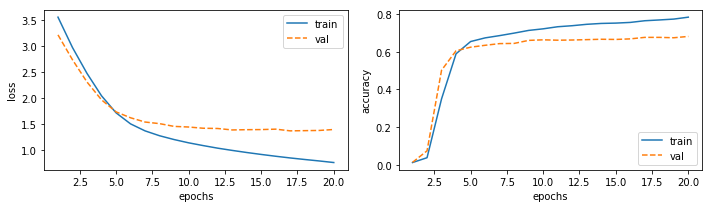

In [44]:
nn = train_model(inputs=10000, hiddens=[64, 4], outputs=46)

In [45]:
nn.evaluate(x_test, y_test_onehot)

2246/2246 [==============================] - 1s 478us/step


[1.4431344112538909, 0.6941228851291185]

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 3s 357us/step - loss: 2.2040 - acc: 0.5460 - val_loss: 1.3975 - val_acc: 0.6830
Epoch 2/20
7982/7982 [==============================] - 2s 192us/step - loss: 1.1204 - acc: 0.7578 - val_loss: 1.1176 - val_acc: 0.7530
Epoch 3/20
7982/7982 [==============================] - 1s 182us/step - loss: 0.7838 - acc: 0.8297 - val_loss: 0.9820 - val_acc: 0.7880
Epoch 4/20
7982/7982 [==============================] - 2s 194us/step - loss: 0.5716 - acc: 0.8753 - val_loss: 0.9054 - val_acc: 0.8060
Epoch 5/20
7982/7982 [==============================] - 2s 213us/step - loss: 0.4165 - acc: 0.9146 - val_loss: 0.8709 - val_acc: 0.8180
Epoch 6/20
7982/7982 [==============================] - 2s 194us/step - loss: 0.3110 - acc: 0.9317 - val_loss: 0.8617 - val_acc: 0.8160
Epoch 7/20
7982/7982 [==============================] - 2s 190us/step - loss: 0.2485 - acc: 0.9427 - val_loss: 0.8949 - val_acc: 0.8060


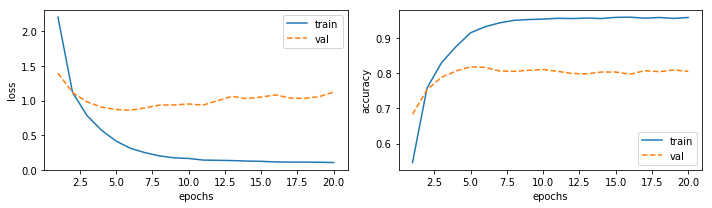

In [46]:
nn = train_model(inputs=10000, hiddens=[128, 128], outputs=46)

In [47]:
nn.evaluate(x_test, y_test_onehot)

2246/2246 [==============================] - 1s 521us/step


[0.946386175716125, 0.7902938557700823]

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 3s 375us/step - loss: 2.7023 - acc: 0.4891 - val_loss: 1.7780 - val_acc: 0.5750
Epoch 2/20
7982/7982 [==============================] - ETA: 0s - loss: 1.4927 - acc: 0.661 - 2s 189us/step - loss: 1.4858 - acc: 0.6629 - val_loss: 1.3750 - val_acc: 0.6920
Epoch 3/20
7982/7982 [==============================] - 2s 190us/step - loss: 1.1422 - acc: 0.7294 - val_loss: 1.2057 - val_acc: 0.7310
Epoch 4/20
7982/7982 [==============================] - 2s 192us/step - loss: 0.9149 - acc: 0.7894 - val_loss: 1.1053 - val_acc: 0.7480
Epoch 5/20
7982/7982 [==============================] - 1s 186us/step - loss: 0.7415 - acc: 0.8274 - val_loss: 1.0369 - val_acc: 0.7800
Epoch 6/20
7982/7982 [==============================] - 2s 200us/step - loss: 0.5996 - acc: 0.8582 - val_loss: 1.0263 - val_acc: 0.7700
Epoch 7/20
7982/7982 [==============================] - 1s 186us/step - loss: 0.4801 - acc: 0.8924

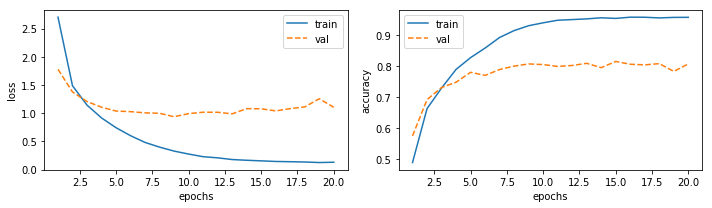

In [48]:
nn = train_model(inputs=10000, hiddens=[64, 64, 64], outputs=46)

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 3s 351us/step - loss: 2.6491 - acc: 0.5975 - val_loss: 1.8539 - val_acc: 0.6750
Epoch 2/20
7982/7982 [==============================] - 1s 181us/step - loss: 1.4852 - acc: 0.7286 - val_loss: 1.3507 - val_acc: 0.7290
Epoch 3/20
7982/7982 [==============================] - 1s 173us/step - loss: 1.0684 - acc: 0.7948 - val_loss: 1.1344 - val_acc: 0.7720
Epoch 4/20
7982/7982 [==============================] - 2s 190us/step - loss: 0.8319 - acc: 0.8394 - val_loss: 1.0173 - val_acc: 0.7960
Epoch 5/20
7982/7982 [==============================] - 1s 186us/step - loss: 0.6676 - acc: 0.8693 - val_loss: 0.9327 - val_acc: 0.8100
Epoch 6/20
7982/7982 [==============================] - 1s 188us/step - loss: 0.5442 - acc: 0.8940 - val_loss: 0.8904 - val_acc: 0.8120
Epoch 7/20
7982/7982 [==============================] - 2s 192us/step - loss: 0.4483 - acc: 0.9104 - val_loss: 0.8614 - val_acc: 0.8160


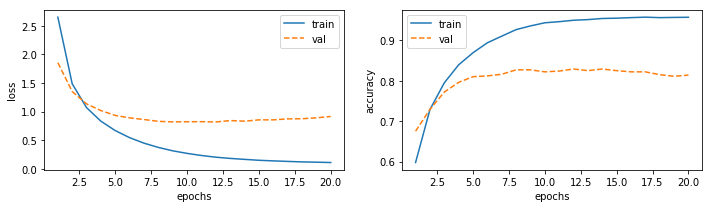

In [49]:
nn = train_model(inputs=10000, hiddens=[64,], outputs=46)

In [50]:
nn.evaluate(x_test, y_test_onehot)

2246/2246 [==============================] - 1s 470us/step


[0.9166313621048829, 0.8054318788958148]

In [51]:
y_pred = nn.predict(x_test)

In [53]:
y_pred[0].sum()

0.9999999

In [54]:
np.argmax(y_pred[0])

3

In [55]:
test_labels[0]

3

#### Predicting house prices: a regression example

In [2]:
from keras.datasets import boston_housing

In [17]:
from keras import layers, models
from sklearn.model_selection import KFold

In [3]:
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

57344/57026 [==============================] - 2s 33us/step


In [4]:
train_data.shape, train_targets.shape, test_data.shape, test_targets.shape

((404, 13), (404,), (102, 13), (102,))

In [5]:
train_data.mean(axis=0)

array([3.74511057e+00, 1.14801980e+01, 1.11044307e+01, 6.18811881e-02,
       5.57355941e-01, 6.26708168e+00, 6.90106436e+01, 3.74027079e+00,
       9.44059406e+00, 4.05898515e+02, 1.84759901e+01, 3.54783168e+02,
       1.27408168e+01])

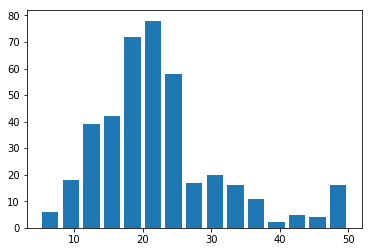

In [8]:
_ = plt.hist(train_targets, bins=15, rwidth=.8)

In [9]:
# preparing the data
mean = train_data.mean(axis=0)
std = train_data.std(axis=0)

In [12]:
x_train = (train_data - mean) / std
x_test = (test_data - mean) / std

In [20]:
def build_model():
    '''helper function for building a regression model'''
    model = models.Sequential()
    model.add(layers.Dense(units=64, activation='relu', input_shape=(train_data.shape[1],)))
    model.add(layers.Dense(units=64, activation='relu'))
    model.add(layers.Dense(units=1))
    model.compile(loss='mse', optimizer='rmsprop', metrics=['mae'])
    return model

In [21]:
n_epochs = 100
k = 4
kf = KFold(n_splits=k, random_state=123, shuffle=True)

k_scores = []
for tr_idx, val_idx in kf.split(x_train):
    nn = build_model()
    nn.fit(x_train[tr_idx], train_targets[tr_idx], epochs=n_epochs, batch_size=1, verbose=0)
    val_loss, val_mae = nn.evaluate(x_train[val_idx], train_targets[val_idx])
    k_scores.append(val_mae)

101/101 [==============================] - 0s 1ms/step


In [22]:
k_scores

[2.28046989676976, 2.3515509036507938, 2.3130839425738494, 2.4474252190920387]

In [23]:
np.mean(k_scores)

2.3481324905216105

In [25]:
n_epochs = 500
k = 4
kf = KFold(n_splits=k, random_state=123, shuffle=True)

mae_by_kfold = []
for i, (tr_idx, val_idx) in enumerate(kf.split(x_train), start=1):
    print("processing fold #", i)
    nn = build_model()
    history = nn.fit(x_train[tr_idx], train_targets[tr_idx], batch_size=8, 
                    epochs=n_epochs, verbose=0, 
                     validation_data=(x_train[val_idx], train_targets[val_idx]))
    
    val_mae = history.history['val_mean_absolute_error']
    mae_by_kfold.append(val_mae)

processing fold # 1
processing fold # 2
processing fold # 3
processing fold # 4


In [26]:
print("Finished")

Finished


In [27]:
a = np.asarray(mae_by_kfold)

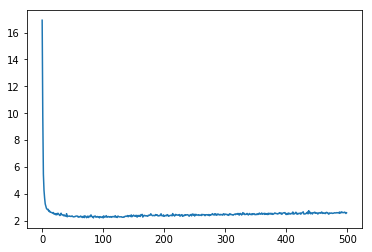

In [29]:
plt.plot(a.mean(axis=0))

In [ ]:
def smooth_curve(points, factor=.9):
    results = []
    for val in points:
        if results:
            prev = results[-1]
            results.append(factor*prev + (1-factor)*val)
        else:
            results.append(val)
    return results

In [34]:
best_epoch = np.argmin(a.mean(axis=0))
best_epoch, a.mean(axis=0)[best_epoch]

(100, 2.219283649236849)

In [33]:
nn = build_model()
nn.fit(x_train, train_targets, batch_size=8, epochs=best_epoch)

Epoch 1/100
404/404 [==============================] - 2s 5ms/step - loss: 483.3276 - mean_absolute_error: 20.1546
Epoch 2/100
404/404 [==============================] - 0s 854us/step - loss: 211.9098 - mean_absolute_error: 12.3959
Epoch 3/100
404/404 [==============================] - 0s 966us/step - loss: 55.9308 - mean_absolute_error: 5.7747
Epoch 4/100
404/404 [==============================] - 0s 1ms/step - loss: 29.4169 - mean_absolute_error: 3.9170
Epoch 5/100
404/404 [==============================] - 1s 2ms/step - loss: 23.1751 - mean_absolute_error: 3.4104
Epoch 6/100
404/404 [==============================] - 1s 2ms/step - loss: 20.2260 - mean_absolute_error: 3.1207
Epoch 7/100
404/404 [==============================] - 1s 2ms/step - loss: 17.7948 - mean_absolute_error: 2.9146
Epoch 8/100
404/404 [==============================] - 1s 2ms/step - loss: 16.2735 - mean_absolute_error: 2.8035
Epoch 9/100
404/404 [==============================] - 1s 2ms/step - loss: 15.0361 - mea

404/404 [==============================] - 1s 2ms/step - loss: 5.3836 - mean_absolute_error: 1.6154
Epoch 74/100
404/404 [==============================] - 1s 2ms/step - loss: 5.3624 - mean_absolute_error: 1.6472
Epoch 75/100
404/404 [==============================] - 1s 2ms/step - loss: 5.2838 - mean_absolute_error: 1.6120
Epoch 76/100
404/404 [==============================] - 1s 2ms/step - loss: 5.3232 - mean_absolute_error: 1.6229
Epoch 77/100
404/404 [==============================] - 1s 2ms/step - loss: 5.3005 - mean_absolute_error: 1.5916
Epoch 78/100
404/404 [==============================] - 1s 2ms/step - loss: 5.4029 - mean_absolute_error: 1.6263
Epoch 79/100
404/404 [==============================] - 1s 1ms/step - loss: 5.1232 - mean_absolute_error: 1.5905
Epoch 80/100
404/404 [==============================] - 1s 2ms/step - loss: 5.0228 - mean_absolute_error: 1.5676
Epoch 81/100
404/404 [==============================] - 1s 2ms/step - loss: 5.0549 - mean_absolute_error: 1.5

In [35]:
nn.evaluate(x_test, test_targets)

102/102 [==============================] - 0s 4ms/step


[15.026107638489966, 2.4242415615156587]